In [35]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(os.path.dirname(module_path))
from collections import defaultdict
from rl.markov_process import FiniteMarkovProcess,FiniteMarkovRewardProcess
from rl.distribution import Choose,Constant,Categorical
from dataclasses import dataclass

from typing import (Dict, Iterable, Generic, Sequence, Tuple,
                    Mapping, Optional, TypeVar)

# Q1: Write out the state space and structure of transition probability

We can see there's 101 states in the game from 0-100. However, if we take a closer look, some states will never be reached, for example, state 4 is never reached landing at state will bring u directly to 14. So we will need to remove the number of ladders + snakes, so the effective state space is 101-19=82.  

The transition probability will just be 
\begin{equation}
P(S_t|S_{t-1})=
    \begin{cases} 
      1/6 & |S_t-S_{t-1}|\leq 6 \\
      0 & \text{otherwise}
   \end{cases}
\end{equation}
Note that the above probability is before processing the transition of snakes and ladder. And we will need to bounce back if we are at 100

In [2]:
ladders_d = {
    1:38,
    4:14,
    9:31,
    16:6,
    28:84,
    36:44,
    21:42,
    47:26,
    49:11,
    51:67,
    56:53,
    62:19,
    64:60,
    71:91,
    80:100,
    87:24,
    93:73,
    95:75,
    98:78
}

In [17]:

def teleporter(x):
    '''
    Will return final position if there's a snake/ladder at current position.
    Will consider about bouncing at 100
    '''
    if x>100:
        x = 200-x
    if x in ladders_d:
        return ladders_d[x]
    return x

# Question 2: create transition map and plot distribution of time steps 

In [18]:
non_terminal_states = [x for x in range(100) if x not in ladders_d]
transition_map = {100:None}
for s0 in non_terminal_states:
    d = defaultdict(int)
    for i in range(1,7):
        d[teleporter(s0+i)]+=1
    transition_map[s0]= Categorical(d)

snl = FiniteMarkovProcess(transition_map)

In [19]:
print(snl)

100 is a Terminal State
From State 0:
  To State 38 with Probability 0.167
  To State 2 with Probability 0.167
  To State 3 with Probability 0.167
  To State 14 with Probability 0.167
  To State 5 with Probability 0.167
  To State 6 with Probability 0.167
From State 2:
  To State 3 with Probability 0.167
  To State 14 with Probability 0.167
  To State 5 with Probability 0.167
  To State 6 with Probability 0.167
  To State 7 with Probability 0.167
  To State 8 with Probability 0.167
From State 3:
  To State 14 with Probability 0.167
  To State 5 with Probability 0.167
  To State 6 with Probability 0.167
  To State 7 with Probability 0.167
  To State 8 with Probability 0.167
  To State 31 with Probability 0.167
From State 5:
  To State 6 with Probability 0.167
  To State 7 with Probability 0.167
  To State 8 with Probability 0.167
  To State 31 with Probability 0.167
  To State 10 with Probability 0.167
  To State 11 with Probability 0.167
From State 6:
  To State 7 with Probability 0.16

In [20]:
time_steps = [len(list(snl.simulate(snl.transition(0)))) for _ in range(10000)] ##10000 traces
#list(snl.simulate(snl.transition(0))) <-- will give a list of 1 trace

In [48]:
sum(time_steps)/len(time_steps)

43.5442

(array([ 652., 1449., 1372., 1272.,  935.,  924.,  599.,  558.,  422.,
         379.,  243.,  250.,  166.,  179.,  121.,   88.,   79.,   69.,
          37.,   48.,   32.,   26.,   25.,   15.,   10.,   12.,   11.,
           6.,    4.,    7.,    2.,    5.,    0.,    0.,    3.]),
 array([  7.        ,  13.51428571,  20.02857143,  26.54285714,
         33.05714286,  39.57142857,  46.08571429,  52.6       ,
         59.11428571,  65.62857143,  72.14285714,  78.65714286,
         85.17142857,  91.68571429,  98.2       , 104.71428571,
        111.22857143, 117.74285714, 124.25714286, 130.77142857,
        137.28571429, 143.8       , 150.31428571, 156.82857143,
        163.34285714, 169.85714286, 176.37142857, 182.88571429,
        189.4       , 195.91428571, 202.42857143, 208.94285714,
        215.45714286, 221.97142857, 228.48571429, 235.        ]),
 <BarContainer object of 35 artists>)

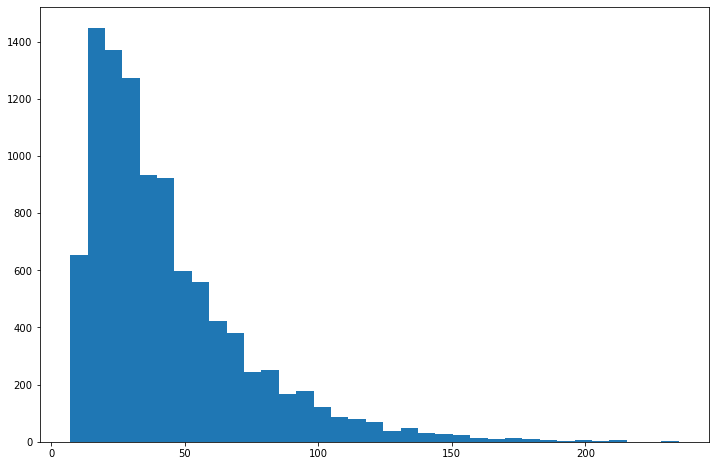

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.hist(time_steps,bins=35)

# Q4 FiniteMarkovRewardProcess
+1 reward for each step and gamma = 1

In [39]:
s,distri = list(transition_map.items())[1]

In [45]:
transition_reward_map ={}
for s0,d in transition_map.items():
    if d is None:
        continue
    d2 = {}
    for s1,p in transition_map[s0]:
        d2[(s1,1)]=p
    transition_reward_map[s0]= Categorical(d2)
mrp = FiniteMarkovRewardProcess(transition_reward_map)

In [49]:
print(mrp)

From State 0:
  To [State 38 and Reward 1.000] with Probability 0.167
  To [State 2 and Reward 1.000] with Probability 0.167
  To [State 3 and Reward 1.000] with Probability 0.167
  To [State 14 and Reward 1.000] with Probability 0.167
  To [State 5 and Reward 1.000] with Probability 0.167
  To [State 6 and Reward 1.000] with Probability 0.167
From State 2:
  To [State 3 and Reward 1.000] with Probability 0.167
  To [State 14 and Reward 1.000] with Probability 0.167
  To [State 5 and Reward 1.000] with Probability 0.167
  To [State 6 and Reward 1.000] with Probability 0.167
  To [State 7 and Reward 1.000] with Probability 0.167
  To [State 8 and Reward 1.000] with Probability 0.167
From State 3:
  To [State 14 and Reward 1.000] with Probability 0.167
  To [State 5 and Reward 1.000] with Probability 0.167
  To [State 6 and Reward 1.000] with Probability 0.167
  To [State 7 and Reward 1.000] with Probability 0.167
  To [State 8 and Reward 1.000] with Probability 0.167
  To [State 31 and 

In [47]:
mrp.get_value_function_vec(1)[0]

43.32459744172655

In [46]:
mrp.display_value_function(1)

{0: 43.325,
 2: 43.812,
 3: 43.301,
 5: 43.4,
 6: 43.197,
 7: 42.97,
 8: 42.727,
 10: 42.866,
 11: 42.4,
 12: 41.979,
 13: 41.604,
 14: 41.275,
 15: 40.742,
 17: 39.605,
 18: 39.452,
 19: 39.355,
 20: 39.298,
 22: 37.769,
 23: 38.218,
 24: 38.531,
 25: 38.775,
 26: 38.958,
 27: 39.083,
 29: 40.911,
 30: 40.409,
 31: 40.239,
 32: 40.057,
 33: 39.83,
 34: 39.569,
 35: 39.364,
 37: 39.224,
 38: 38.962,
 39: 38.468,
 40: 38.001,
 41: 38.137,
 42: 37.541,
 43: 38.235,
 44: 37.393,
 45: 35.5,
 46: 35.197,
 48: 33.962,
 50: 32.339,
 52: 33.377,
 53: 32.988,
 54: 32.522,
 55: 32.009,
 57: 32.044,
 58: 31.713,
 59: 30.65,
 60: 29.729,
 61: 28.931,
 63: 25.886,
 65: 24.273,
 66: 24.198,
 67: 24.146,
 68: 23.615,
 69: 23.356,
 70: 23.279,
 72: 23.749,
 73: 23.836,
 74: 20.431,
 75: 21.802,
 76: 22.819,
 77: 23.553,
 78: 24.052,
 79: 24.358,
 81: 30.028,
 82: 28.92,
 83: 27.96,
 84: 27.049,
 85: 26.191,
 86: 25.516,
 88: 22.272,
 89: 22.205,
 90: 21.578,
 91: 21.042,
 92: 21.472,
 94: 17.499,
 96:

we expect around 43.3 steps to complete this game